In [1]:
%load_ext autoreload
%autoreload 2

import sys  
sys.path.insert(0, 'functions')
sys.path.insert(0, 'training')

In [2]:
from Clusterer import *
from plotting import *
from data_functions import *

### This notebook should remain unchanged, with the exception of editing the values in the cell directly below

In [3]:
#root_file = "hcal_pi+_0-110GeVLinear_17degFixed.root"
#root_file = "hcalInsert_pi+_0-100GeVLinear.root"
root_file = "hcal_pi-_Theta20n20deg_0-60GeVLogUniform.root"


#label = "HCal_0-110GeVLinear_17degFixed"
#label = "Insert_0-100GeVLinear"
label ="HCal_0-60GeVLogUniform20n20deg"


detector_name = "HcalEndcapPHitsReco" #or "HcalEndcapPInsertHitsReco"
sampling_fraction = 0.02 #or 0.0098

#detector_name = "HcalEndcapPInsertHitsReco"
#sampling_fraction = 0.0098

NEvents_Max = 1_000_000 #OK if tree has less events than this
Energy_Bins = binning=np.linspace(0.1,110,21) #Plotting

Do_Processing = False
Do_Training = False
#saves to path/numpy_file. Only needs to be run frist time. 
# Change to False for messing with plots

In [4]:
if Do_Processing:
    
    Clusterer = Strawman_Clusterer(root_file, label, detector_name, sampling_fraction, NEvents_Max)
    Clusterer.run_clusterer()

    del Clusterer
#Ignore: " DeprecationWarning: `np.str` "

### Load Strawman (cluster sum) and Generated Data

In [5]:
ClusterSum = load_ClusterSum(label)
GenP = load_GenP(label)


#### Plot Energy Distributions

Plotting QA Distributions...


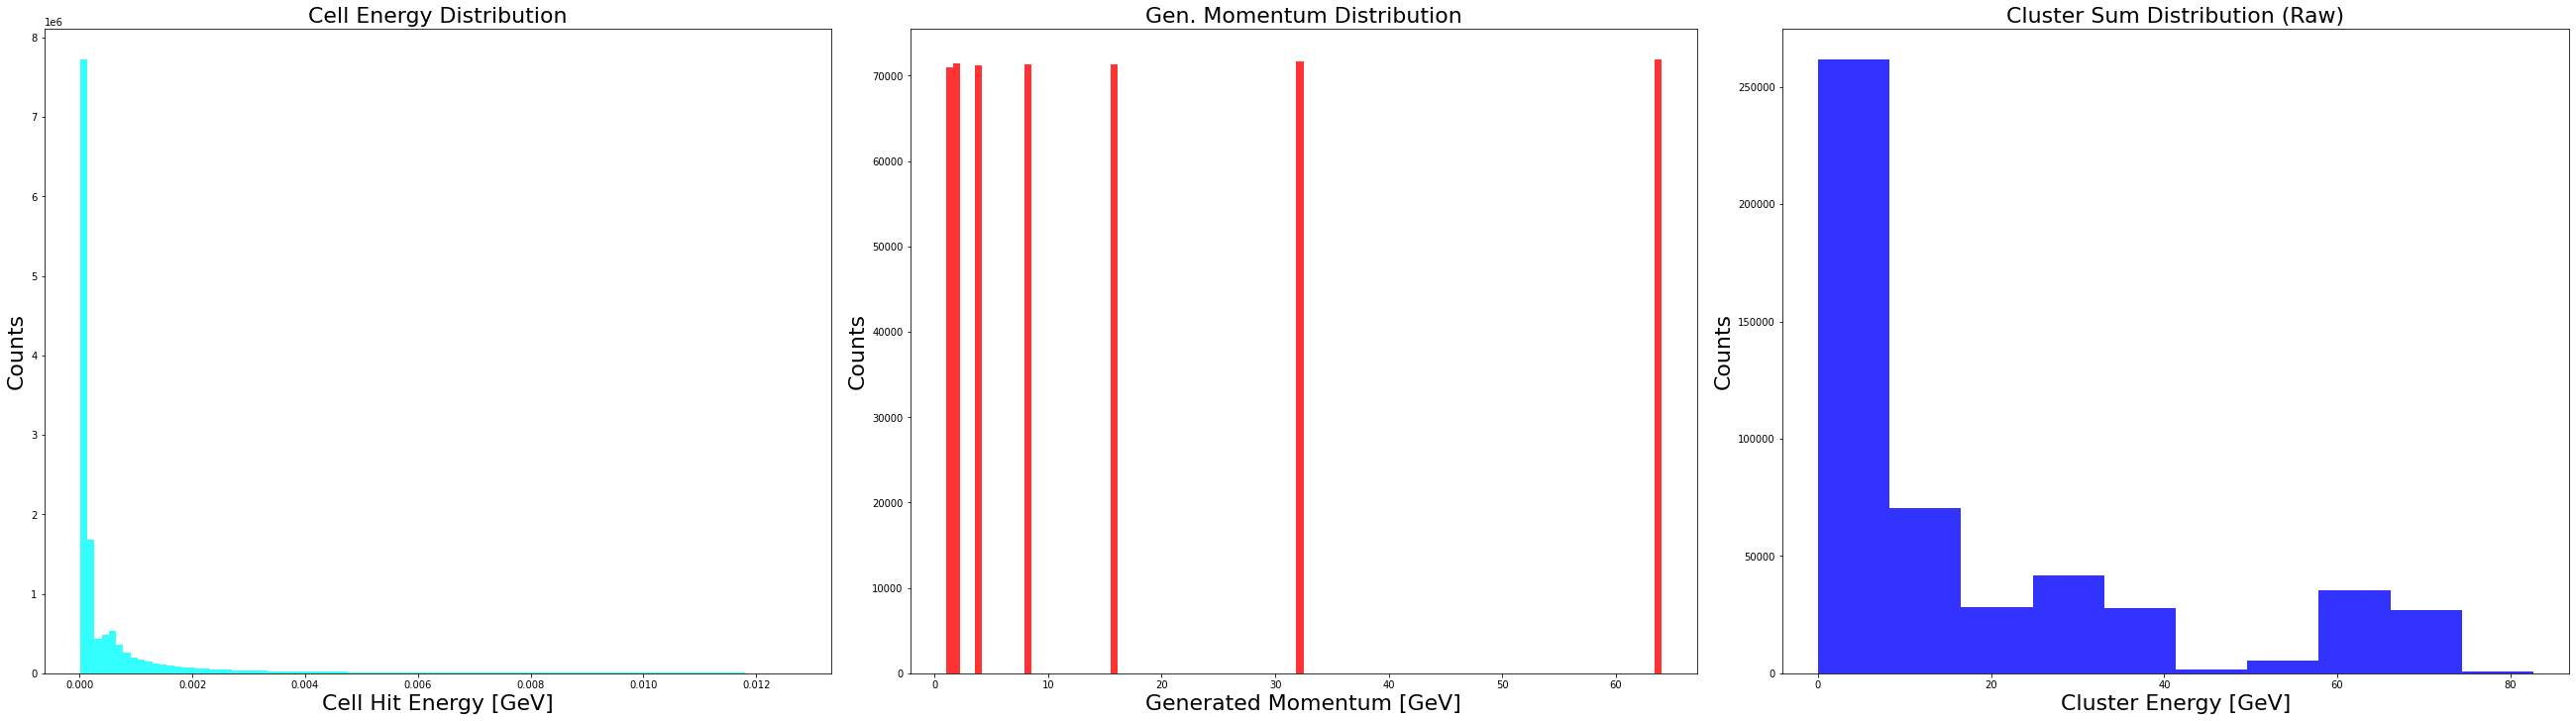

In [6]:
flat_hits_e = load_flat_hits_e(label)
energy_QA_plots(flat_hits_e, GenP, ClusterSum, label)

#### Plot Clusters vs Generated

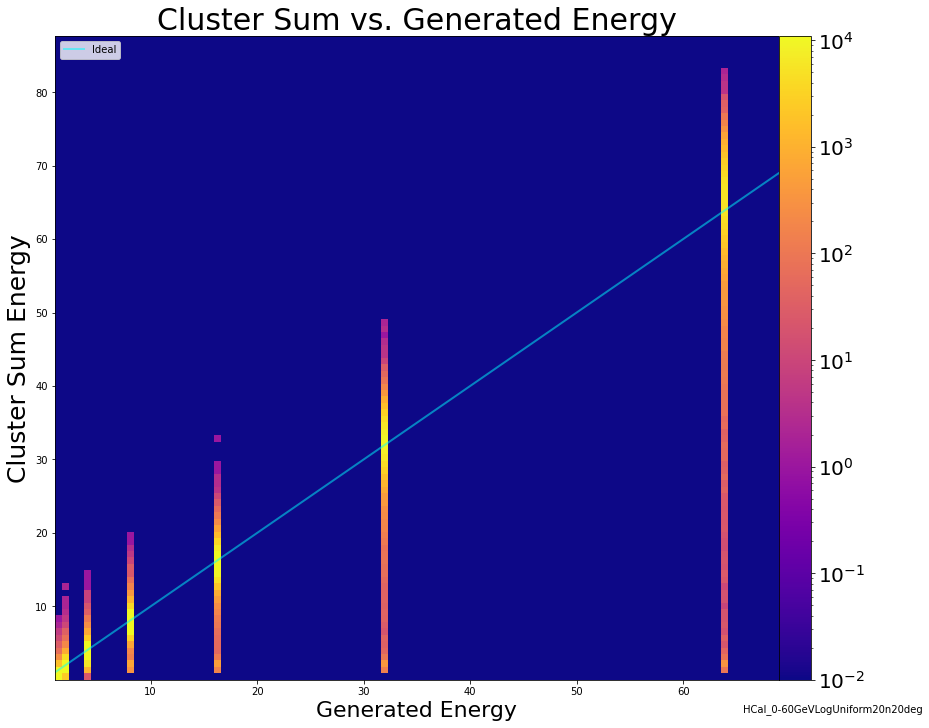

In [7]:
ClusterSum_vs_GenP(ClusterSum, GenP, label)

In [8]:
from NN_Regression import *

ImportError: cannot import name 'load_ClusterSum_and_GenP' from 'Clusterer' (/clusterfs/ml4hep_nvme2/ftoralesacosta/regressiononly/functions/Clusterer.py)

In [ ]:
NN_Regression = NN_Regressor(label)

In [ ]:
if (Do_Training):
    NN_Regression.run_NN_regression()

In [ ]:
x_test = np.load(f"./{label}/x_test.npy")
y_test = np.load(f"./{label}/y_test.npy")
preds = np.load(f"./{label}/predictions.npy")
loss = np.load(f"./{label}/loss.npy")
val_loss = np.load(f"./{label}/val_loss.npy")

In [ ]:
ClusterSum_vs_GenP(preds[:,0],y_test,label)

In [ ]:
Plot_Loss_Curve(loss,val_loss,label,loss_string="MAE") #label loss yourself here

## Get Dictionaries with Resolution, Scale, and distributions

In [ ]:
NN = get_res_scale(y_test,preds,binning=np.linspace(0.1,110,21))
strawman = get_res_scale(y_test,x_test,binning=np.linspace(0.1,110,21))

NN_in_RecoBins = get_res_scale_in_reco_bins(y_test,preds,x_test,binning=np.linspace(0.1,110,21))
strawman_in_RecoBins = get_res_scale_in_reco_bins(y_test,x_test,x_test,binning=np.linspace(0.1,110,21))

print(NN.keys())
print(NN_in_RecoBins.keys())

In [ ]:
Plot_Resolutions(NN,strawman,label)

In [ ]:
Plot_Energy_Scale(NN,label,sampling_fraction,strawman)
Plot_Energy_Scale(NN_in_RecoBins,label,sampling_fraction,None,"reco")

In [ ]:
plot_slices(NN["slices"],NN['avg_truth'],label,Energy_Bins,"Truth",)

In [ ]:
plot_slices(NN["scale_array"],NN['avg_truth'],label, Energy_Bins,"Truth",scale=True)